In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


LiMa is eq 17, genLiMa is from the Aharonian paper (as used by VEGAS), EDLiMa is my understanding of how ED does it.  If this is wrong, please correct me

In [26]:
def LiMa(on, off, alpha):
    opA = 1.  + alpha
    N   = on  + off
    T1  = on  * np.log(opA/alpha*on/N)
    T2  = off * np.log(opA*off/N)
    return np.sqrt(2*(T1 + T2))

def genLiMa(on, off, alpha):
    sOn  = np.sum(on)
    sOff = np.sum(off)
    opA  = 1. + alpha
    N    = on + off
    sT1  = sOn / np.sum(alpha/opA*N)
    sT2  = sOff / np.sum(N/opA)
    if sOn >= np.sum(off * alpha):
        return np.sqrt(2*(np.sum(on * np.log(sT1)) + np.sum(off * np.log(sT2))))
    else:
        return -1. * np.sqrt(2*(np.sum(on * np.log(sT1)) + np.sum(off * np.log(sT2))))
    
def EDLiMa(on, off, alpha):
    sOn  = np.sum(on)
    sOff = np.sum(off)
    opA  = 1. + alpha
    #sN   = sOn + sOff # ( sum(NOn) + sum(NOff) )
    #sT1  = np.sum(alpha/opA) * sN #sum( alphaNorm / (1+alphaNorm) ) * ( sum(NOn) + sum(NOff) )
    #sT2  = np.sum(1./opA) * sN #sum( 1 / (1+alphaNorm) ) * ( sum(NOn) + sum(NOff) )
    
    alphai = np.sum(alpha/opA*(on+off))/np.sum((on+off)/(1+alpha))
    sT1  = np.sum(alphai/(1+alphai))*(sOn+sOff)
    sT2  = np.sum(1/(1+alphai))*(sOn+sOff)
    aN   = sT1 / sT2
    return LiMa(sOn, sOff, aN)

Simple test - should give same answer

In [26]:
on    = np.array([2])
off   = np.array([5])
alpha = np.array([0.3])
print genLiMa(on, off, alpha)
print EDLiMa(on, off, alpha)

0.336476863477
0.336476863477


Does, right, multiple runs, same alpha, should be the same

In [28]:
on    = np.array([2,3,3,4])
off   = np.array([5,10,15,20])
alpha = np.array([0.2,0.2,0.2,0.2])
print genLiMa(on, off, alpha)
print EDLiMa(on, off, alpha)

0.556578236193
0.556578236193


What if alpha varies?

In [29]:
on    = np.array([2,3,3,4])
off   = np.array([5,10,15,20])
alpha = np.array([0.1,0.2,0.1,0.2])
print genLiMa(on, off, alpha)
print EDLiMa(on, off, alpha)

1.25252726824
1.4326554712


Now we have an issue, we can test this with random number of "runs" with random properties

 nsam = number of runs <br>
 ncount = number of on counts <br>
 valpha = amount of variation in alpha (must be bigger than 0.000001, suggest no bigger than the base alpha (0.3))

n.b. this uses the on counts and alpha to get the off counts, it should be correctly predicting them and give a significance of zero

In [37]:
nsam   = 100
ncount = 10
valpha = 0.00001
on    = np.random.normal(loc = ncount, size = nsam)
alpha = 0.3 + valpha * np.random.rand(nsam)
off   = on / alpha
print genLiMa(on, off, alpha)
print EDLiMa(on, off, alpha)

0.0
1.17607772954e-06


if valpha is small, this appears to work (within rounding, what if we make it bigger?

In [36]:
nsam   = 100
ncount = 10
valpha = 0.01
on    = np.random.normal(loc = ncount, size = nsam)
alpha = 0.3 + valpha * np.random.rand(nsam)
off   = on / alpha
print genLiMa(on, off, alpha)
print EDLiMa(on, off, alpha)

1.20743595266e-06
0.00295556443838


Hang on a 1% difference in alpha causes a 0.3% error - that cant be rounding

In [38]:
nsam   = 100
ncount = 10
valpha = 0.1
on    = np.random.normal(loc = ncount, size = nsam)
alpha = 0.3 + valpha * np.random.rand(nsam)
off   = on / alpha
print genLiMa(on, off, alpha)
print EDLiMa(on, off, alpha)

0.0
0.162466691133


A 10% difference is causing a 16% error - ouch

can you explain what I have done wrong?

## Section 2 - testing actual ED results

Non: 6097, Noff: 5905.29 (49800, norm 0.119),   2.3 sigma,

In [46]:
data = np.loadtxt("anasumCombined_cropped.log") # 0 is on, 1 is off * alpha, 2 is off, 3 is alpha

In [47]:
print genLiMa(data[:,0], data[:,2], data[:,3])
print EDLiMa(data[:,0], data[:,2], data[:,3])

2.33325016059
1.91718876174


In [48]:
LiMa(np.sum(data[:,0]), np.sum(data[:,2]), 5905.29/49800)

2.3448674291375964

<IPython.core.display.Javascript object>


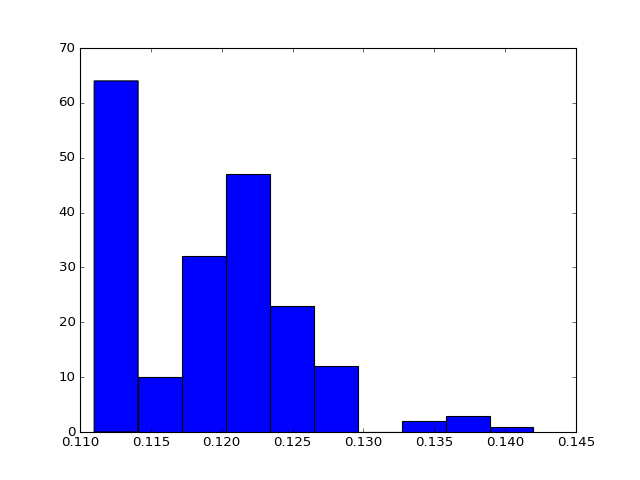

In [49]:
h = plt.hist(data[:,3])